# voice_tone
Using the film's audio track, we can classify emotion in characters' voice tone. We'll use the sound analysis library `librosa` for general sound analysis.

In [1]:
import librosa
from librosa.display import waveplot, specshow
import matplotlib.pyplot as plt
import numpy as np

# Audio Visualization
Before starting to analyze voice emotion, we can visualize a audio clip to help us understand it a little better. This is an eight-second clip from *Booksmart*, with one female character speaking.

Using `load()` on an audio file returns a time-series of the audio file, as well as the sampling rate (in Hz).

In [2]:
audio_file = ('../extracted_audio/chose.wav')

In [3]:
y, sr = librosa.load(audio_file)

In [4]:
y.shape

(176400,)

### Wave Plot
The waveform plot is a visual representation of the audio file, of time vs. amplitude. As this is a stereo file, the left channel is above the axis, and the right channel is below. For our purposes, we can think of amplitude as volume — no amplitude indicates silence.

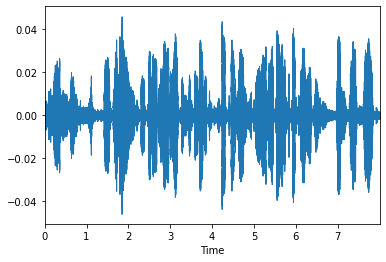

In [5]:
waveplot(y, sr=sr)

### Spectrogram
The spectrogram is the other visualization of an audio file, displaying time vs. two parameters: frequency and intensity. In other words, at any given time, which frequencies are present, and how intense?

This type of visualization requires calculations in the frequency domain, as opposed to the time domain. Thus, a Fourier transform is needed to convert the waveform to frequency domain at each time interval.

In [6]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

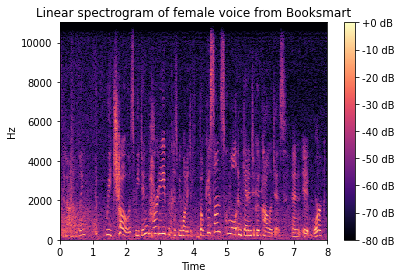

In [7]:
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Linear spectrogram of female voice from Booksmart')
fig.colorbar(img, ax=ax, format="%+2.f dB")

Since we're working with human voice audio, we can tailor our spectorgrams to this specific purpose. Typical human voices have a frequency in the low hundreds: men between 80-180 Hz, and women from 160-250 Hz.

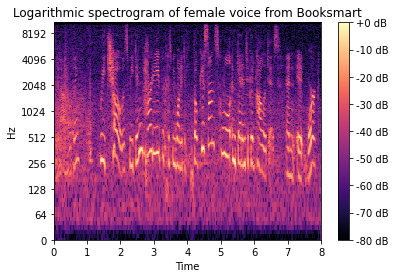

In [8]:
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Logarithmic spectrogram of female voice from Booksmart')
fig.colorbar(img, ax=ax, format="%+2.f dB")

This gives us a better representation of the female character's voice. Let's compare it to a male character's voice from *Extremely Wicked, Shockingly Evil and Vile*.

In [9]:
audio_file = ('../extracted_audio/disappeared.wav')
y, sr = librosa.load(audio_file)
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

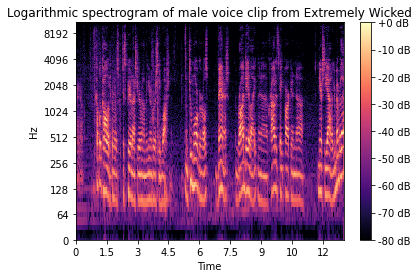

In [10]:
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Logarithmic spectrogram of male voice clip from Extremely Wicked')
fig.colorbar(img, ax=ax, format="%+2.f dB")

The strongest intensities are at lower frequencies than in the clip of a female voice.